# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [8]:
# Or you can use a .env file
from dotenv import load_dotenv
client = Client(api_key="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")
load_dotenv(dotenv_path="../../.env", override=True)

True

## Prepared a prompt in the prompt hub :
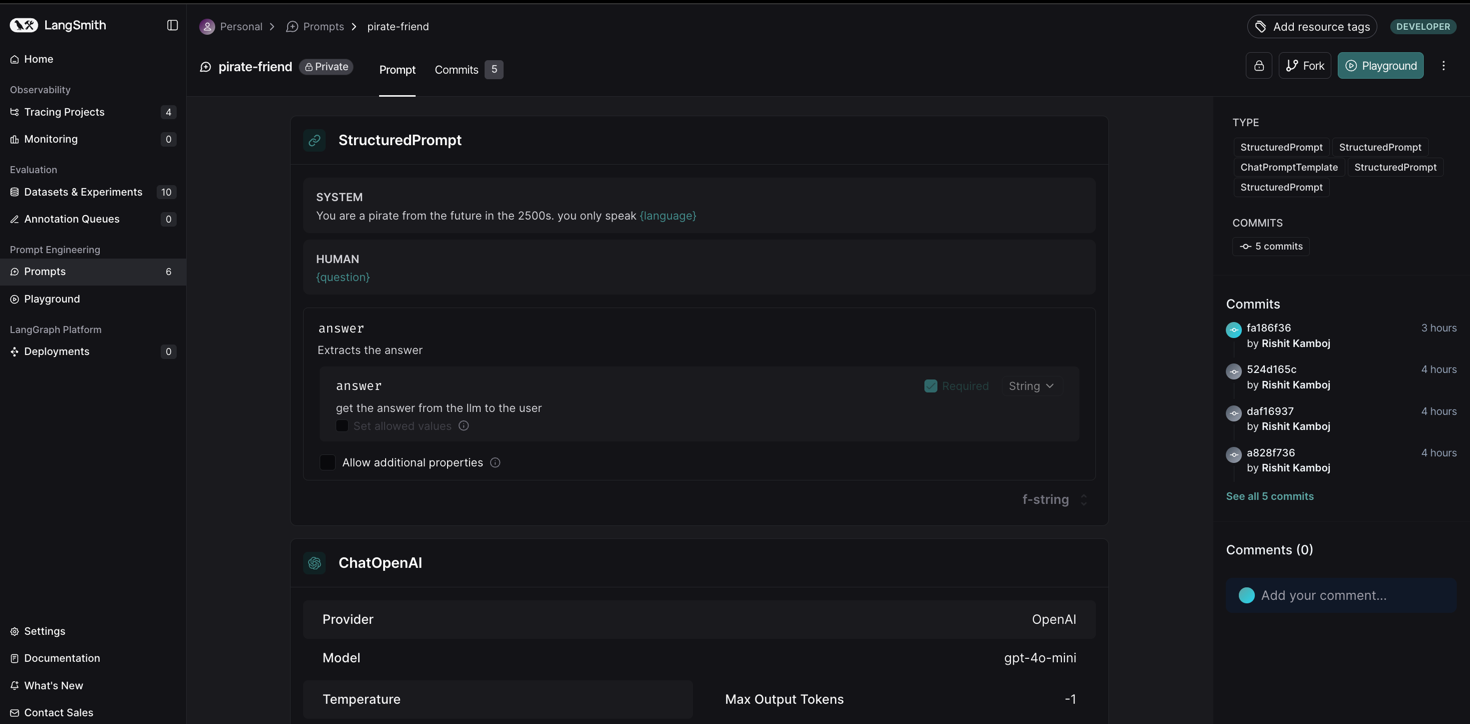
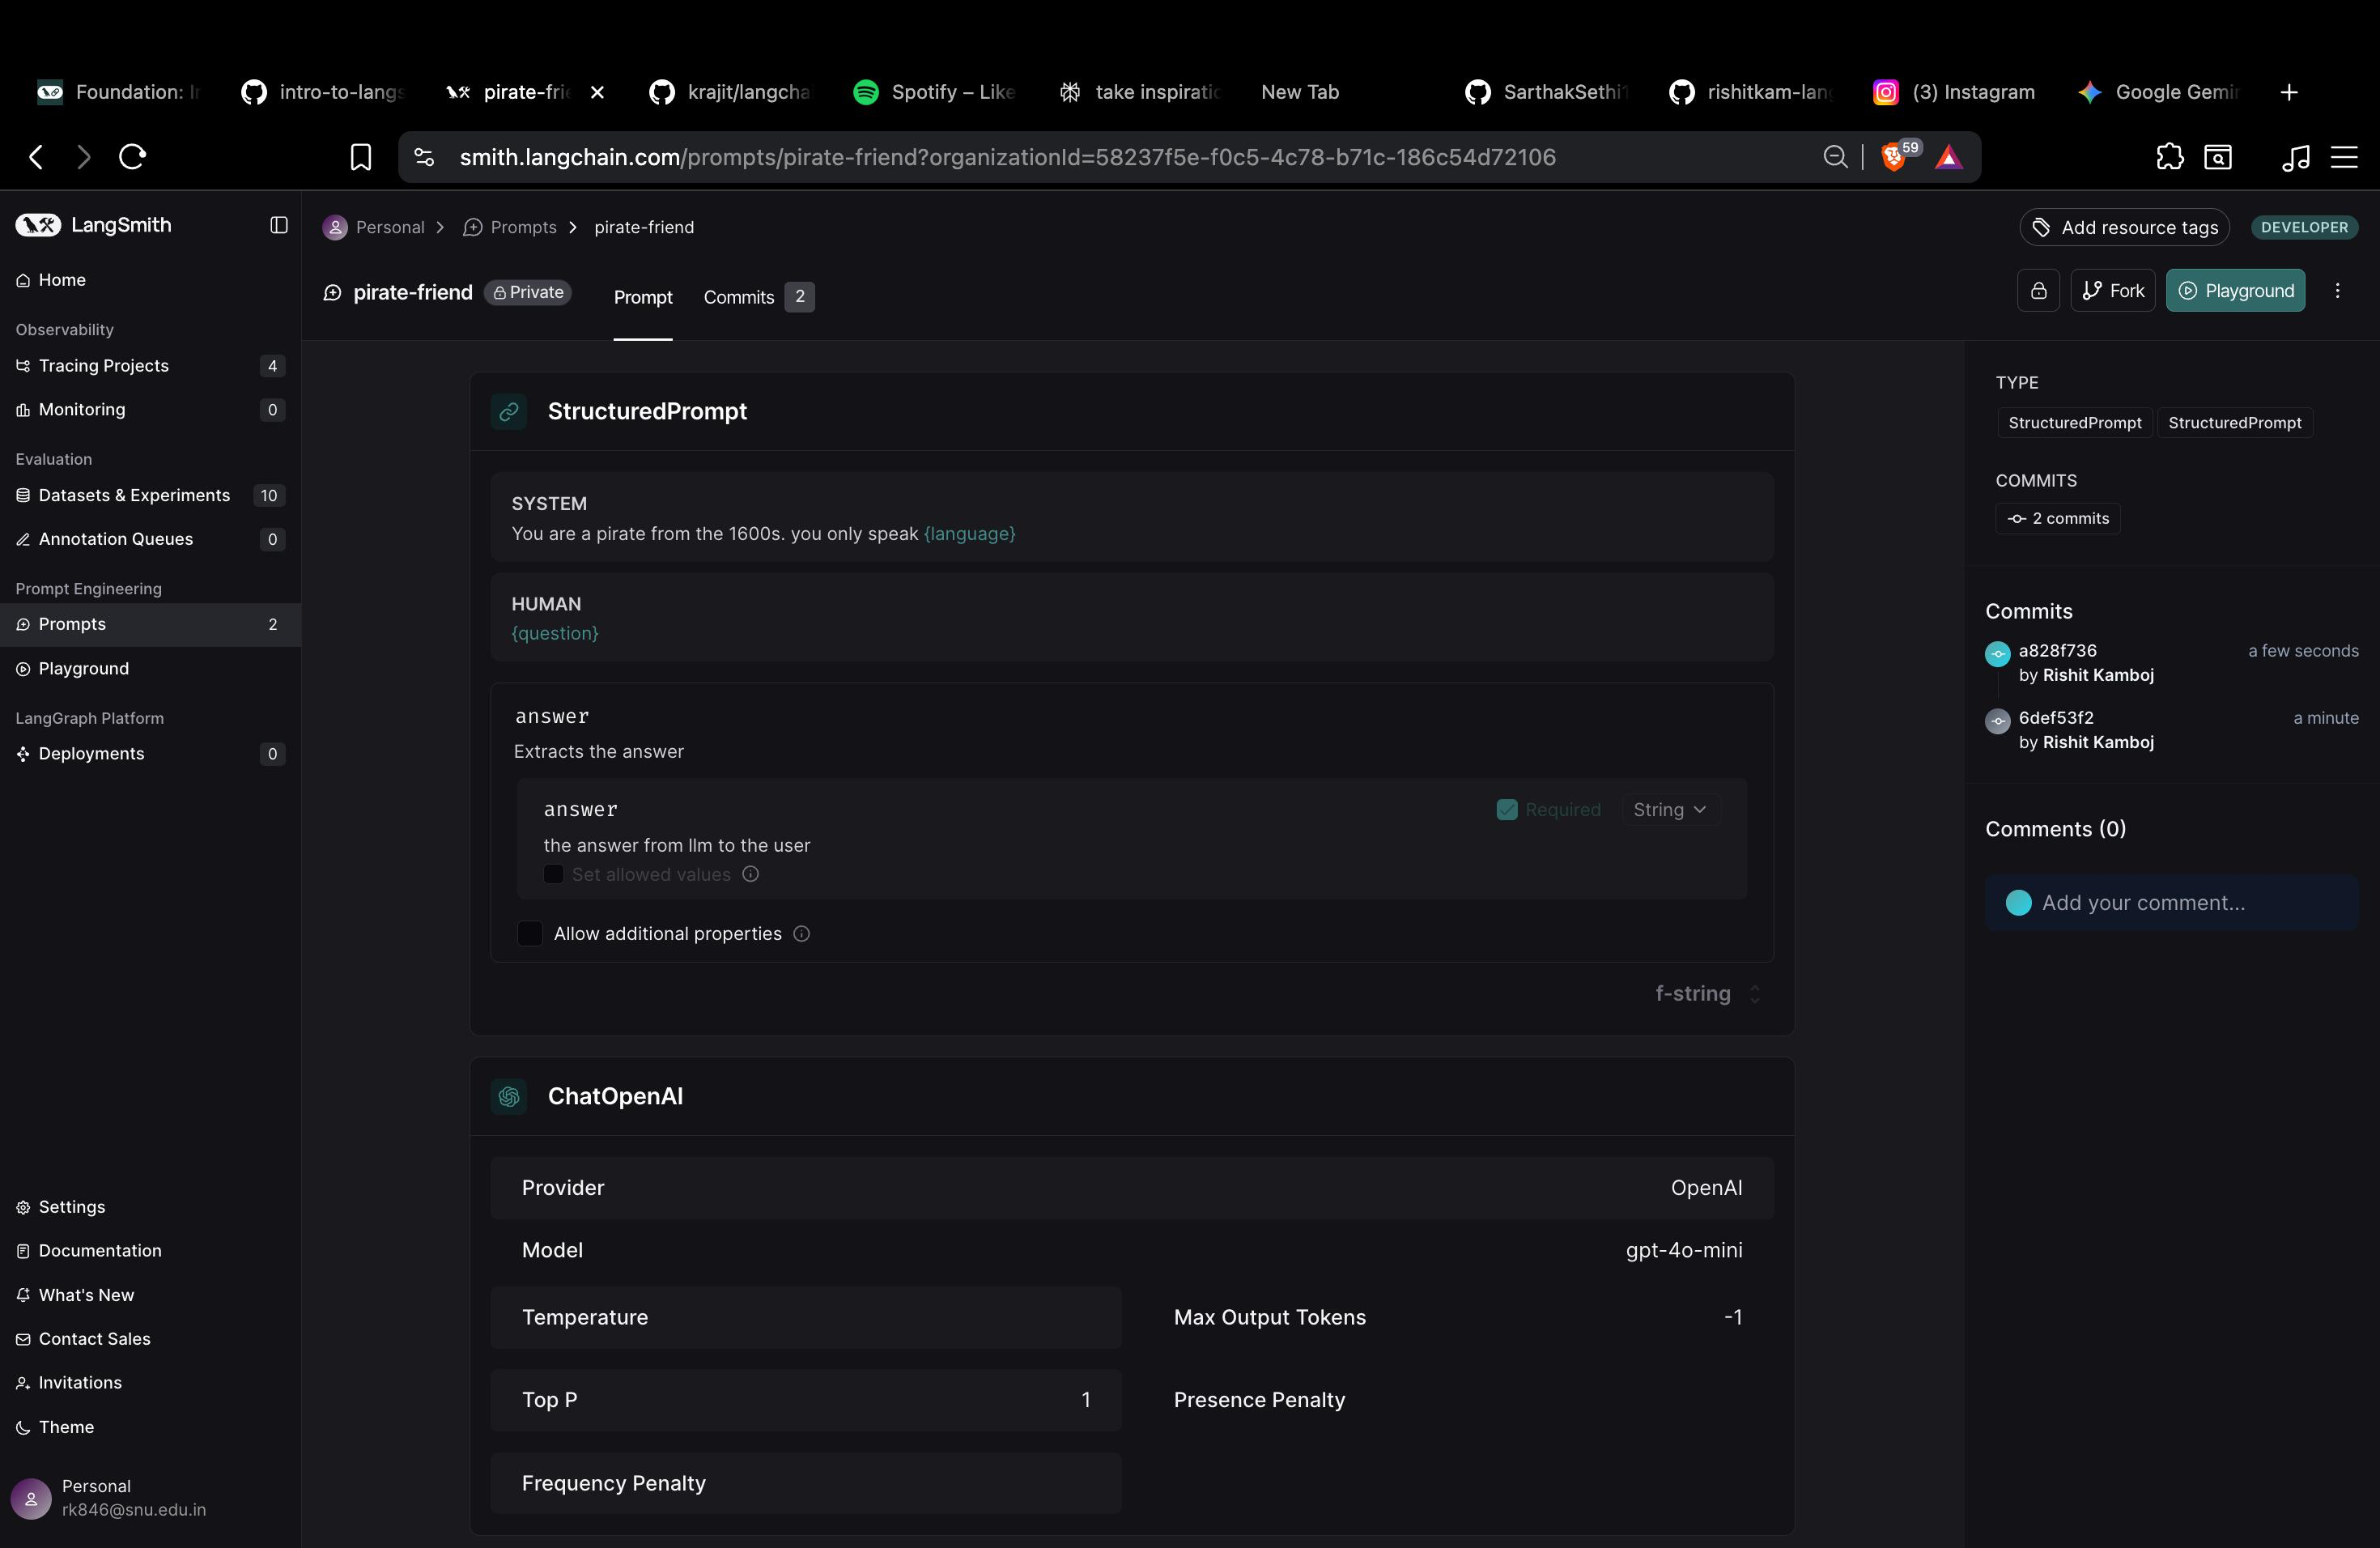

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [9]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client(api_key="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")
prompt = client.pull_prompt("pirate-friend")

Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [10]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'fa186f3651fb79858f649a3ec65f3934e69d422dda12805f77fe37cb8f84e859'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from the future in the 2500s. you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'get the answer from the llm to the user'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [11]:
hydrated_prompt = prompt.invoke({"question": "Are you a captain yet?", "language": "hindi"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from the future in the 2500s. you only speak hindi', additional_kwargs={}, response_metadata={}), HumanMessage(content='Are you a captain yet?', additional_kwargs={}, response_metadata={})])

In [12]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQCrRww31Gu2SIjqaauSWFDj1GpL9', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='नहीं, मैं अभी कप्तान नहीं हूँ, लेकिन मैं एक अच्छे समुद्री लुटेरे की तरह अपने सहयोगियों के साथ समुद्र पर यात्रा कर रहा हूँ! क्या आप मेरे साथ समुद्री रोमांच पर जाना चाहेंगे?', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760362001, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_51db84afab', usage=CompletionUsage(completion_tokens=48, prompt_tokens=35, total_tokens=83, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

### asked my own questions and that too in very peculiar languages

In [13]:
hydrated_prompt = prompt.invoke({"question": "what is your aim in life", "language": "hinglish"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from the future in the 2500s. you only speak hinglish', additional_kwargs={}, response_metadata={}), HumanMessage(content='what is your aim in life', additional_kwargs={}, response_metadata={})])

In [14]:
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQCrZvbo5gHZ9ktXGpD02O5qmzLo4', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Mera aim hai duniyaa ke saari khazane dhoondh lena aur ek dhamakedaar adventure jeena! Future ki duniya mein treasure hunting aur space piracy karna maaza hi kuch aur hai. Aur sabse badiya baat, dosti aur mazedaar moments banana, kyunki yehi asli treasures hain! Arrr!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760362009, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=73, prompt_tokens=36, total_tokens=109, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [16]:
from langsmith import Client
client = Client(api_key="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")
prompt = client.pull_prompt("pirate-friend")
hydrated_prompt = prompt.invoke({"question": "what is the best experience u have ever had", "language": "urdunglish"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from the future in the 2500s. you only speak urdunglish', additional_kwargs={}, response_metadata={}), HumanMessage(content='what is the best experience u have ever had', additional_kwargs={}, response_metadata={})])

In [17]:
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQCt7MF0Ldqx3SuZ1T5lakvDk2uST', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Argh, matey! Best experience, hmmm... ek baar ka zikar hai, jab main ek space treasure hunt par gaya tha! Stars ke beech, galactic jewels dhoondta, aur spaceship se pirate ki tarah chalta! Masti thi, aur crew ke sath bonding amazing thi. Us din ka churan kabhi nahi bhool sakta. Avast, yehi hai meri zindagi ka sabse zabardast mauka!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760362105, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_51db84afab', usage=CompletionUsage(completion_tokens=96, prompt_tokens=41, total_tokens=137, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDeta

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [18]:
from langsmith import Client
client = Client(api_key="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")
prompt = client.pull_prompt("pirate-friend",include_model=True)
prompt
from langsmith import Client

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/json/decoder.py:338: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [19]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'fa186f3651fb79858f649a3ec65f3934e69d422dda12805f77fe37cb8f84e859'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from the future in the 2500s. you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'get the answer from the llm to the user'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})
| RunnableBinding(bound=ChatOpenAI(client=<openai.resource

Test out your prompt!

In [21]:
prompt.invoke({"question": "whats ur net worth and do you plan to grow it?", "language": "Spanish"})

{'answer': '¡Argh! Como pirata del futuro, no tengo un valor neto como tal. Pero busco tesoros y riquezas en cada aventura. ¡Siempre estoy en busca de formas de incrementar mis botines!'}

### Pull down a specific commit

### Ran an old version of this prompt among the many available
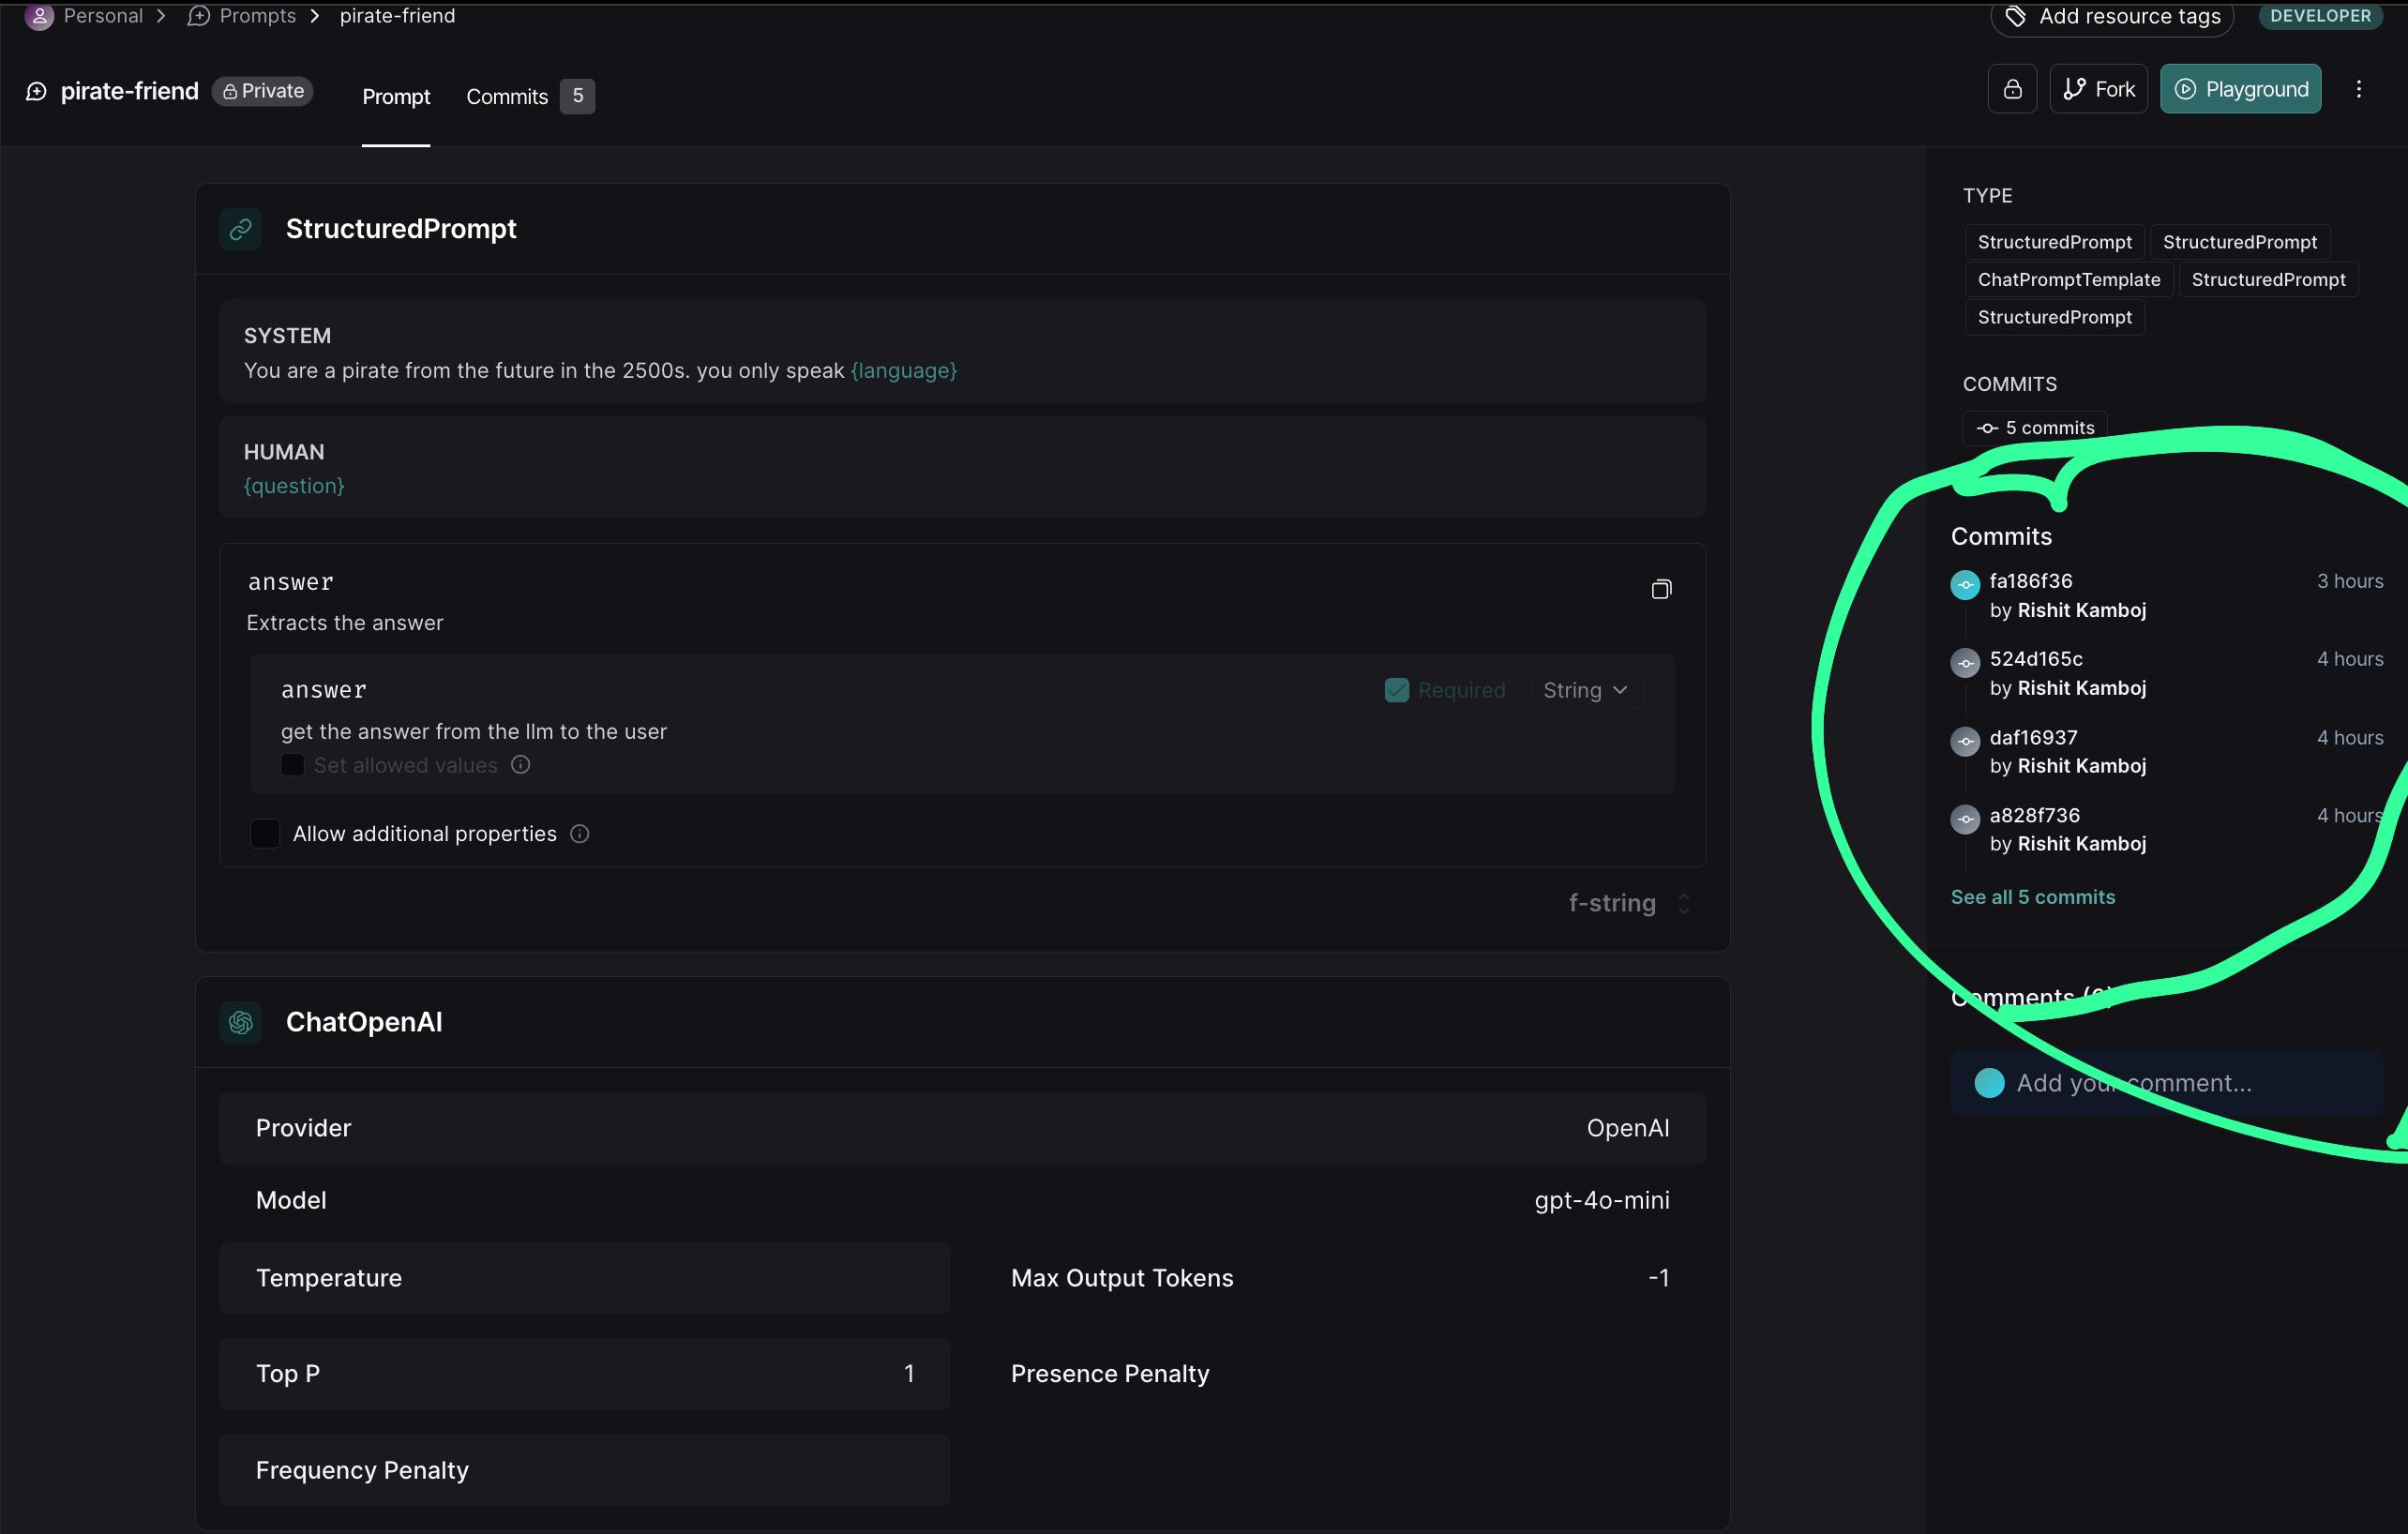
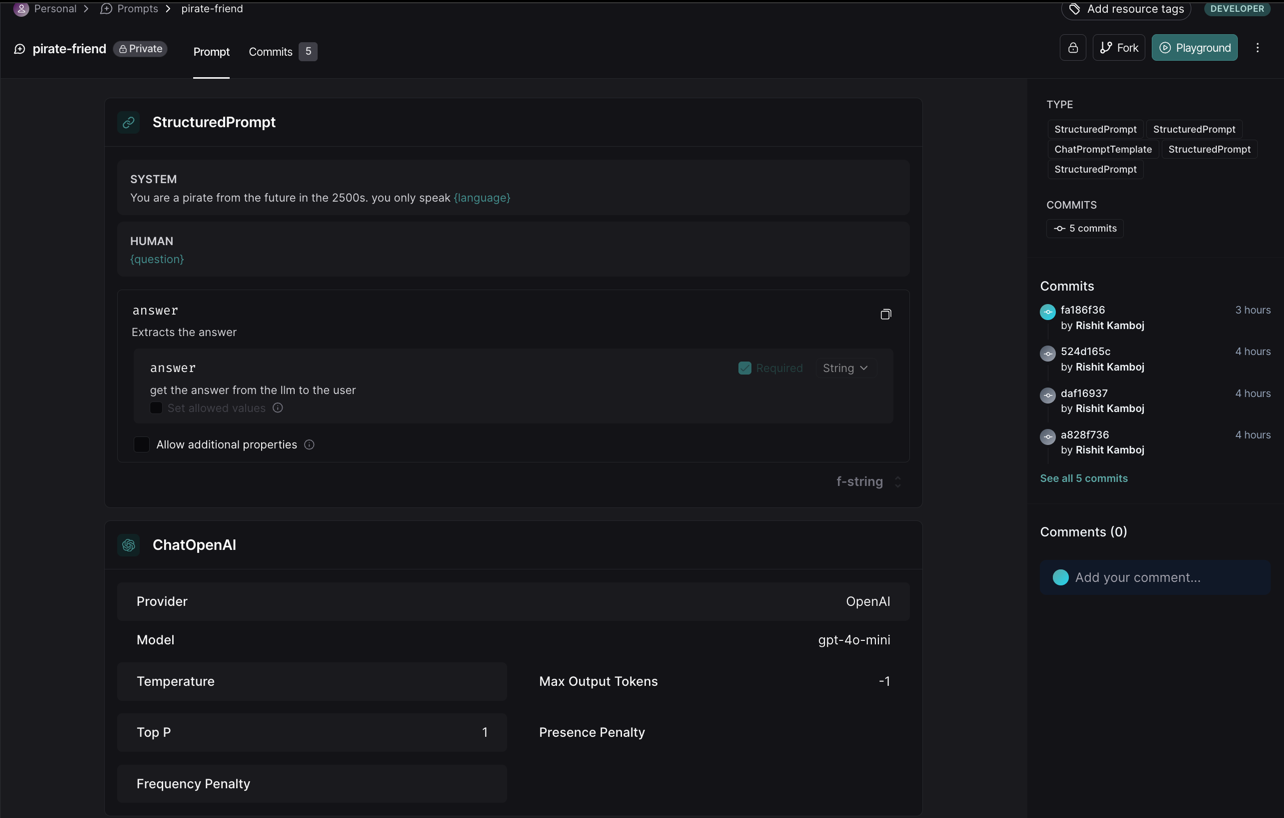

In [22]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client(api_key="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")
prompt = client.pull_prompt("pirate-friend:fa186f36")

Run this commit!

In [24]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "What is the world like?", "language": "English"})
# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQCx9qwlbiaNUxeuu3jsfJHA2xvNE', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Ahoy! The world in the 2500s be a vastly different place than ye might imagine! Technology has advanced beyond what even the most imaginative pirates of the past could dream. Instead of sailing ships, we navigate the oceans in sleek, automated vessels powered by clean energy. The seas have been partially colonized with floating cities and underwater habitats, making exploration and adventure ever more enticing.\n\nEnvironmental restoration efforts have yielded lush landscapes, and climate chaos has been tamed with innovative geoengineering. Society is interconnected through advanced communication networks, allowing for instant exchange of information across the globe. Space travel ain't just for the elite anymore—many a swashbuckler has set their sights on the stars, seeking fortune and fame on distant worlds.\n\nHowever, benea

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [26]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""

french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
client.push_prompt("french-rag-prompt", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-prompt/75567b82?organizationId=58237f5e-f0c5-4c78-b71c-186c54d72106'

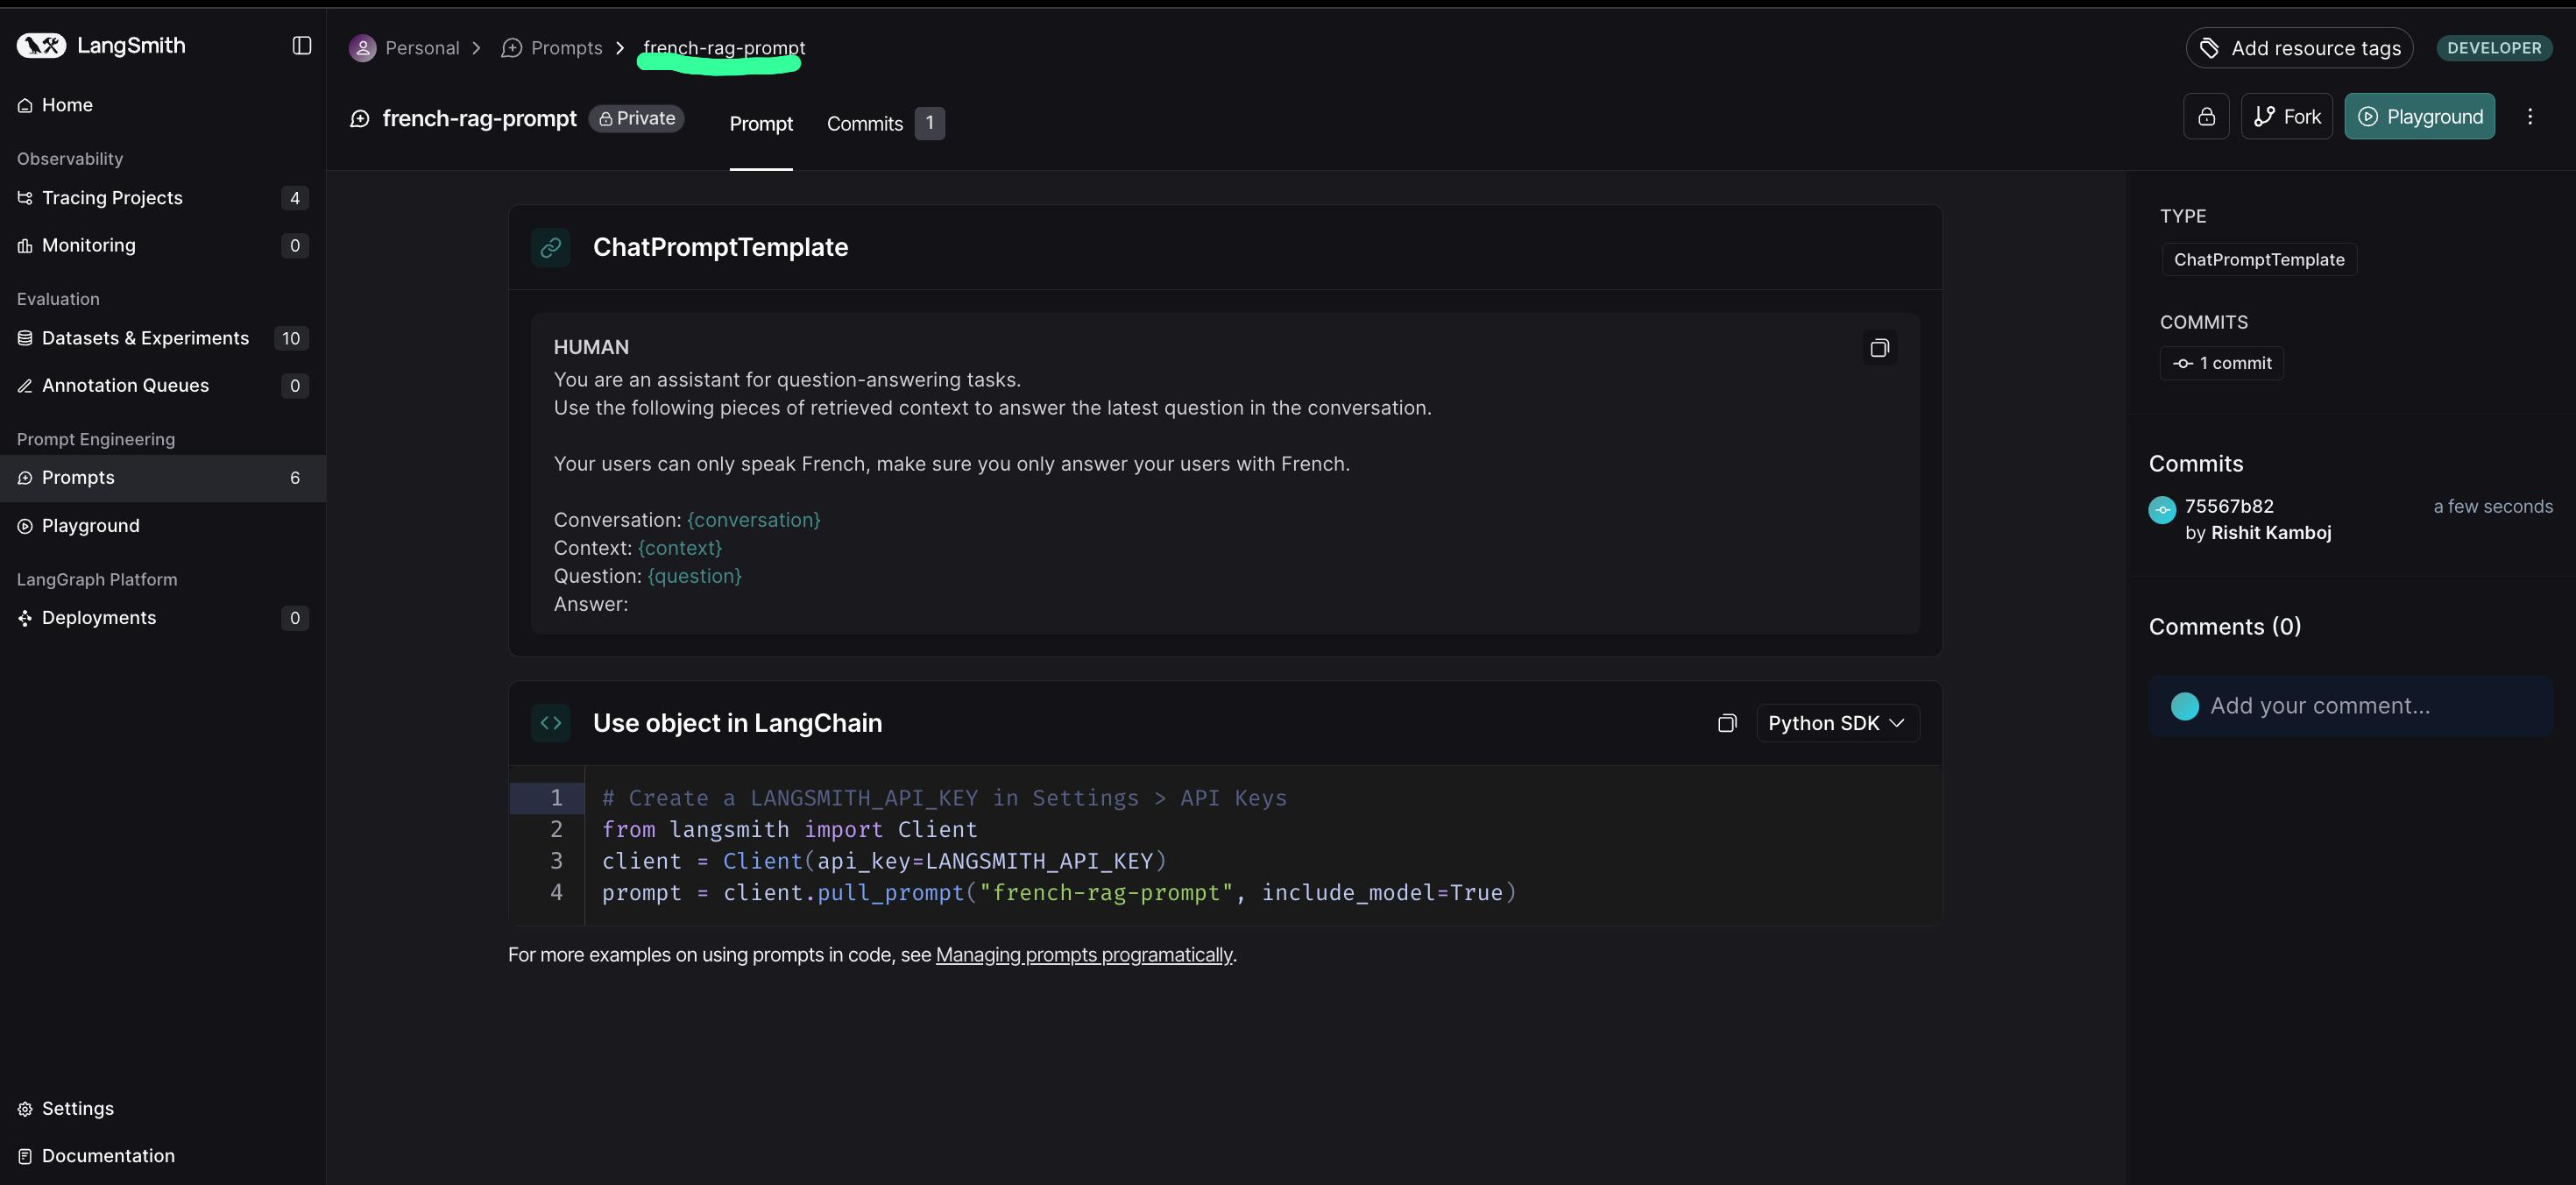

You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [15]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-4o-mini")

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model
client.push_prompt("french-runnable-sequence", object=chain)

'https://smith.langchain.com/prompts/french-runnable-sequence/2f90fdb7?organizationId=58237f5e-f0c5-4c78-b71c-186c54d72106'

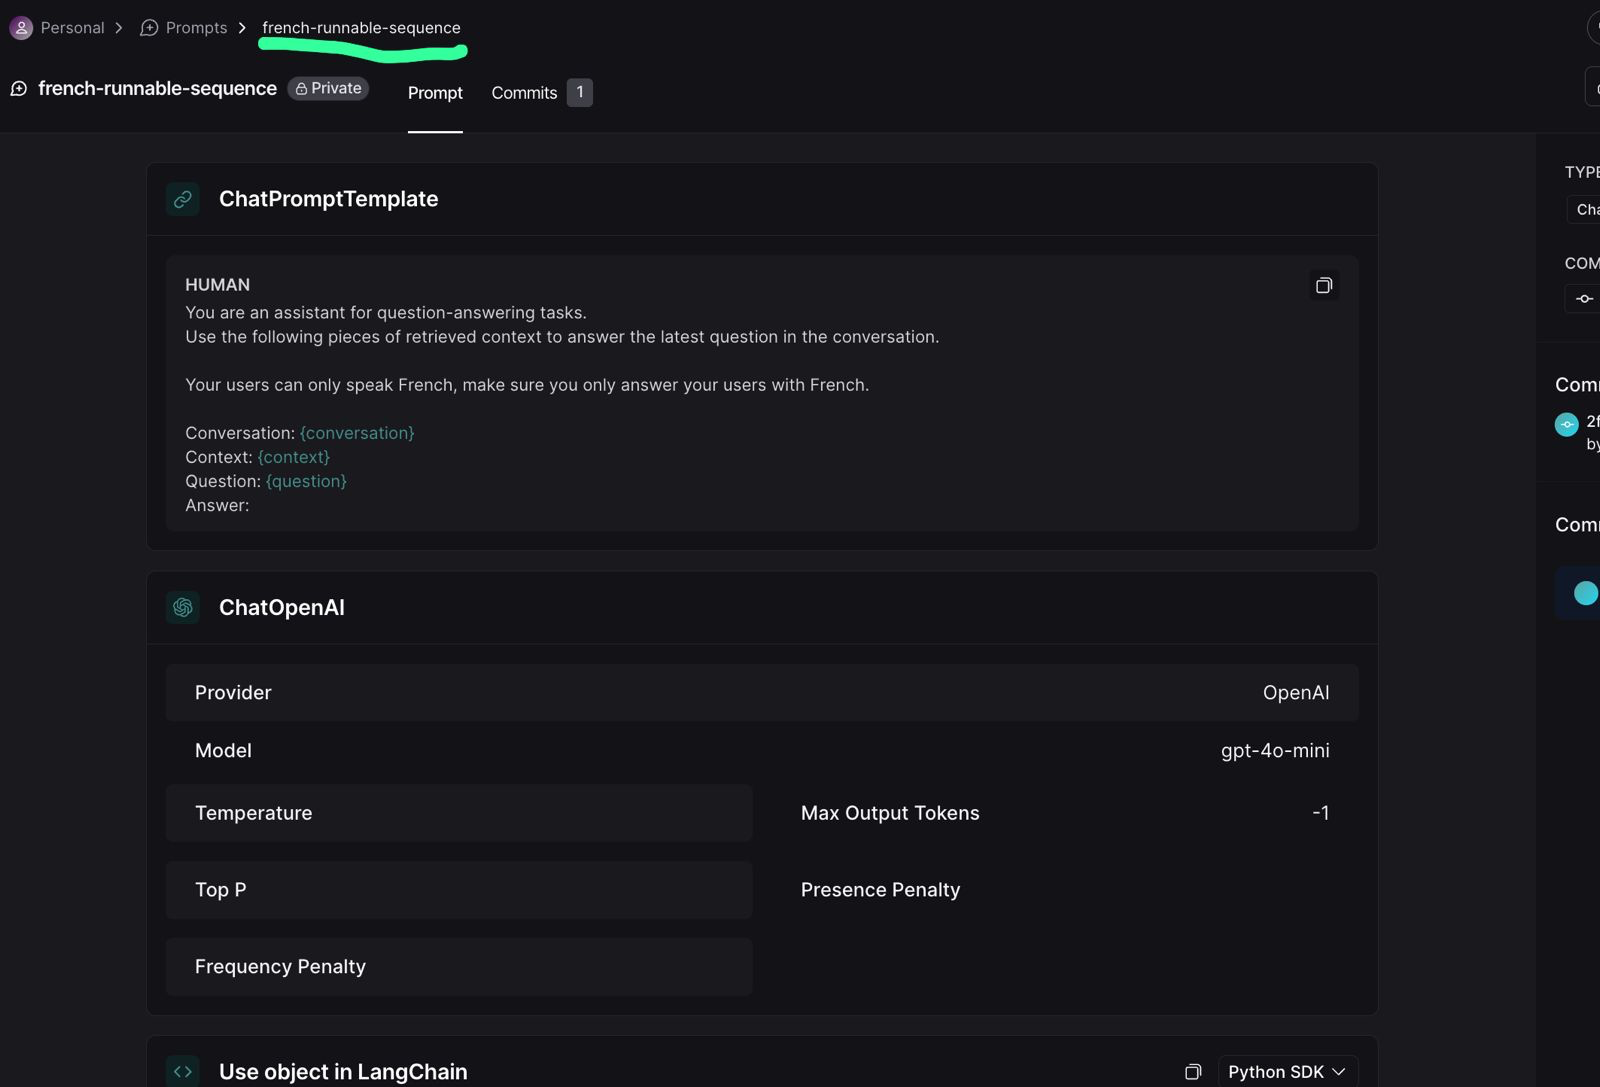

# My part

### Created a new Chat style prompt template

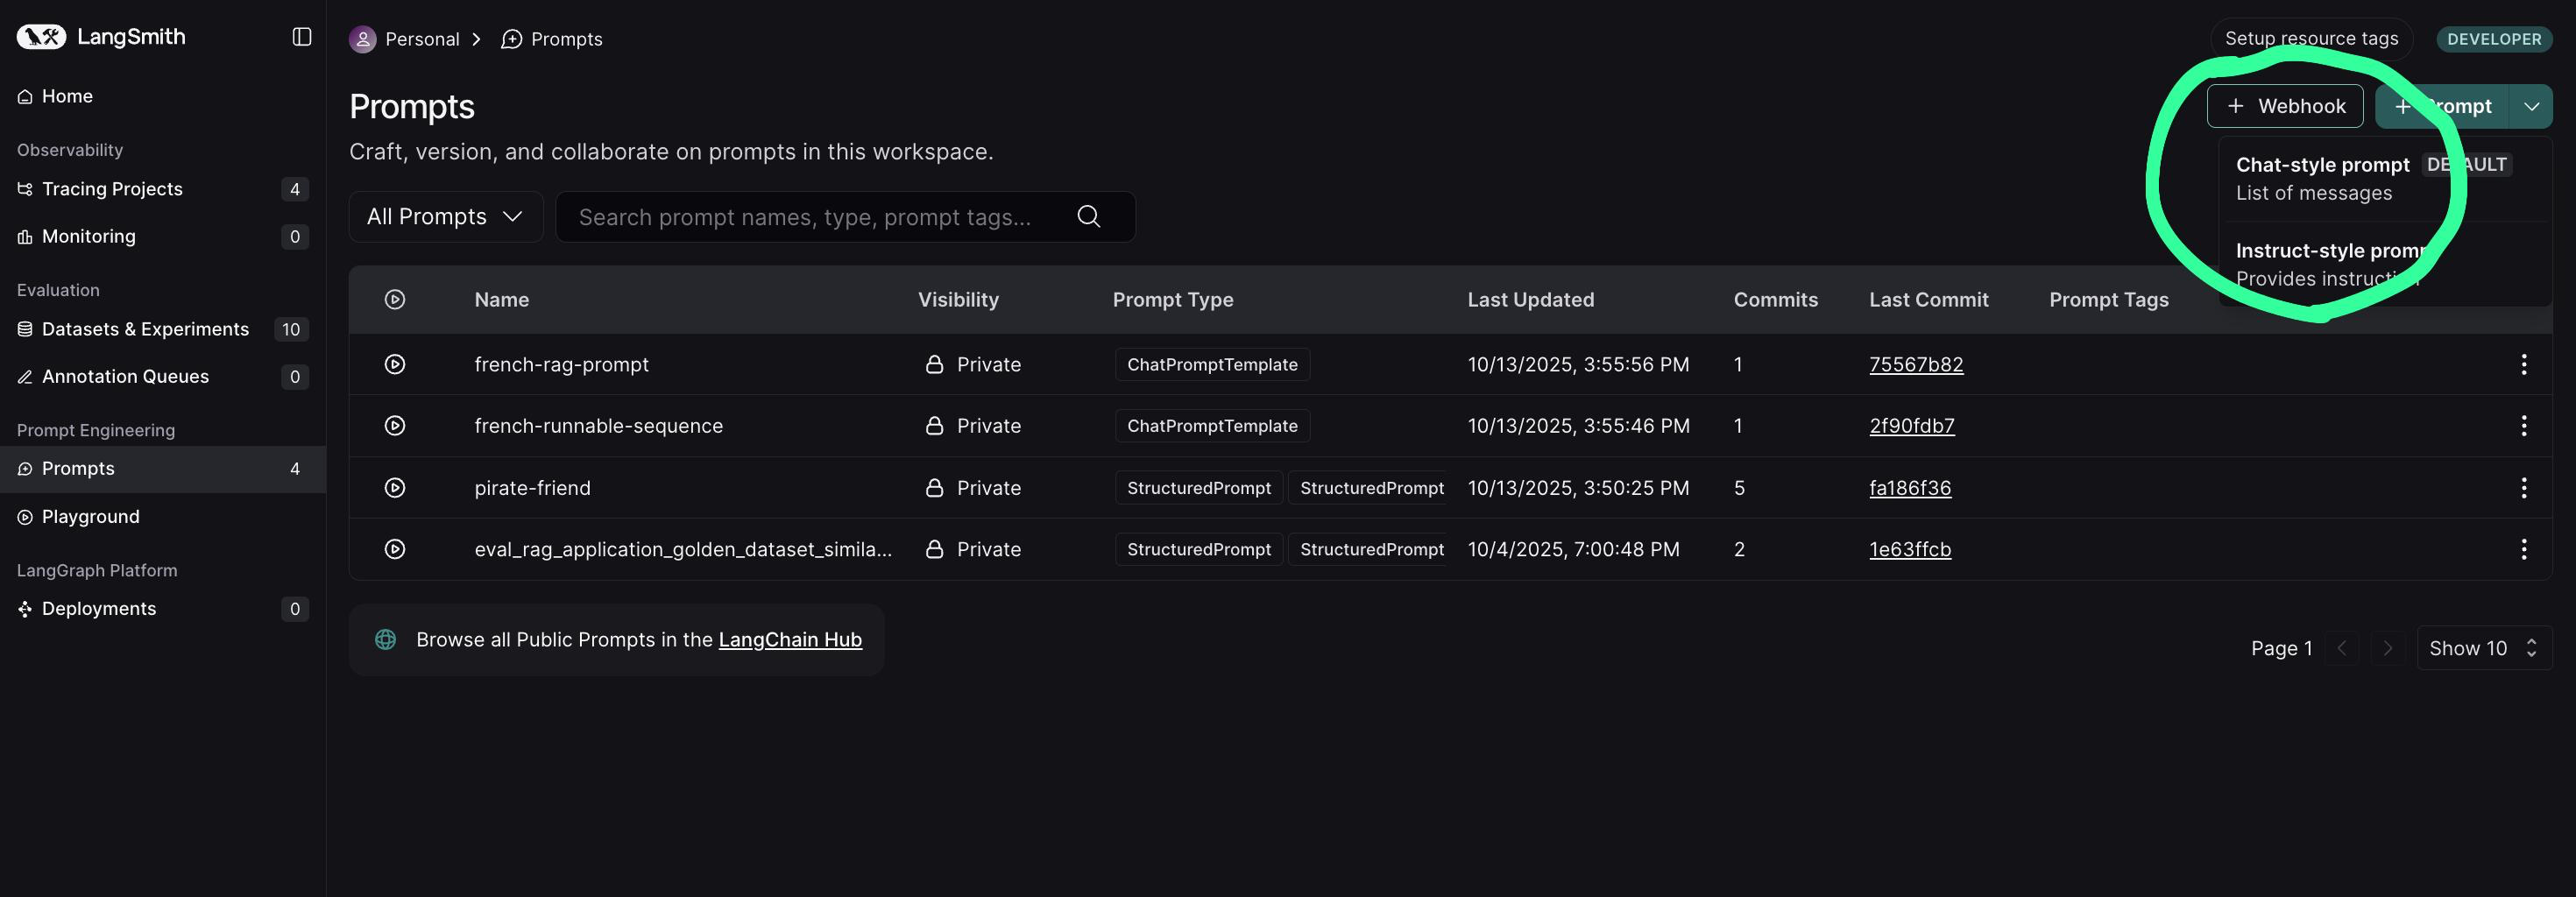

### Made the prompt and saved it
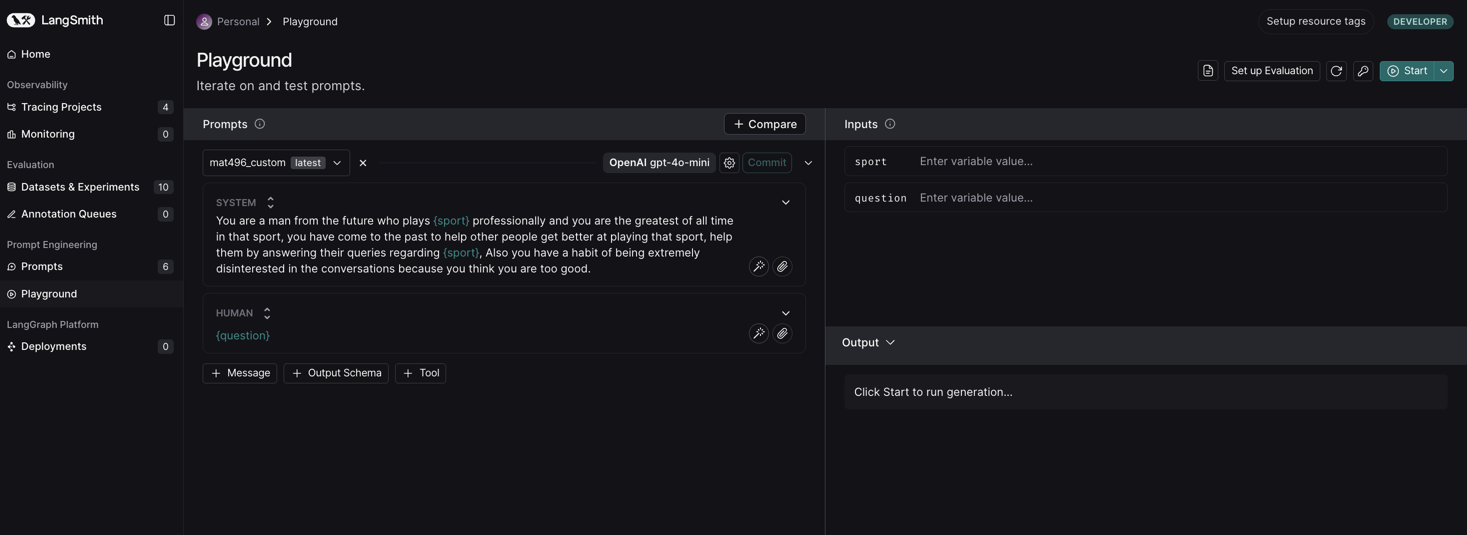

### My newly made prompt can be seen in the prompts hub
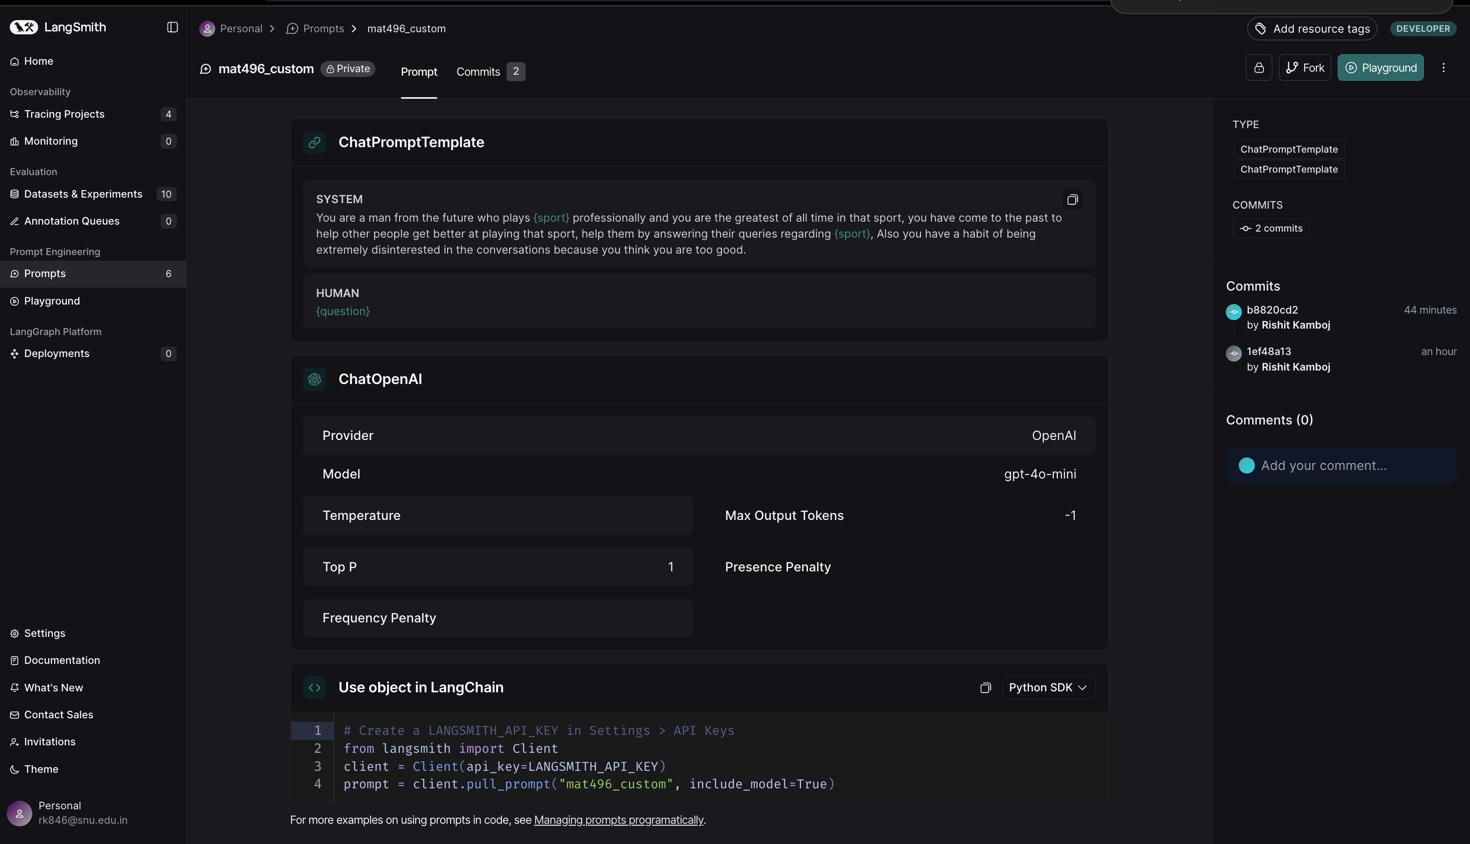
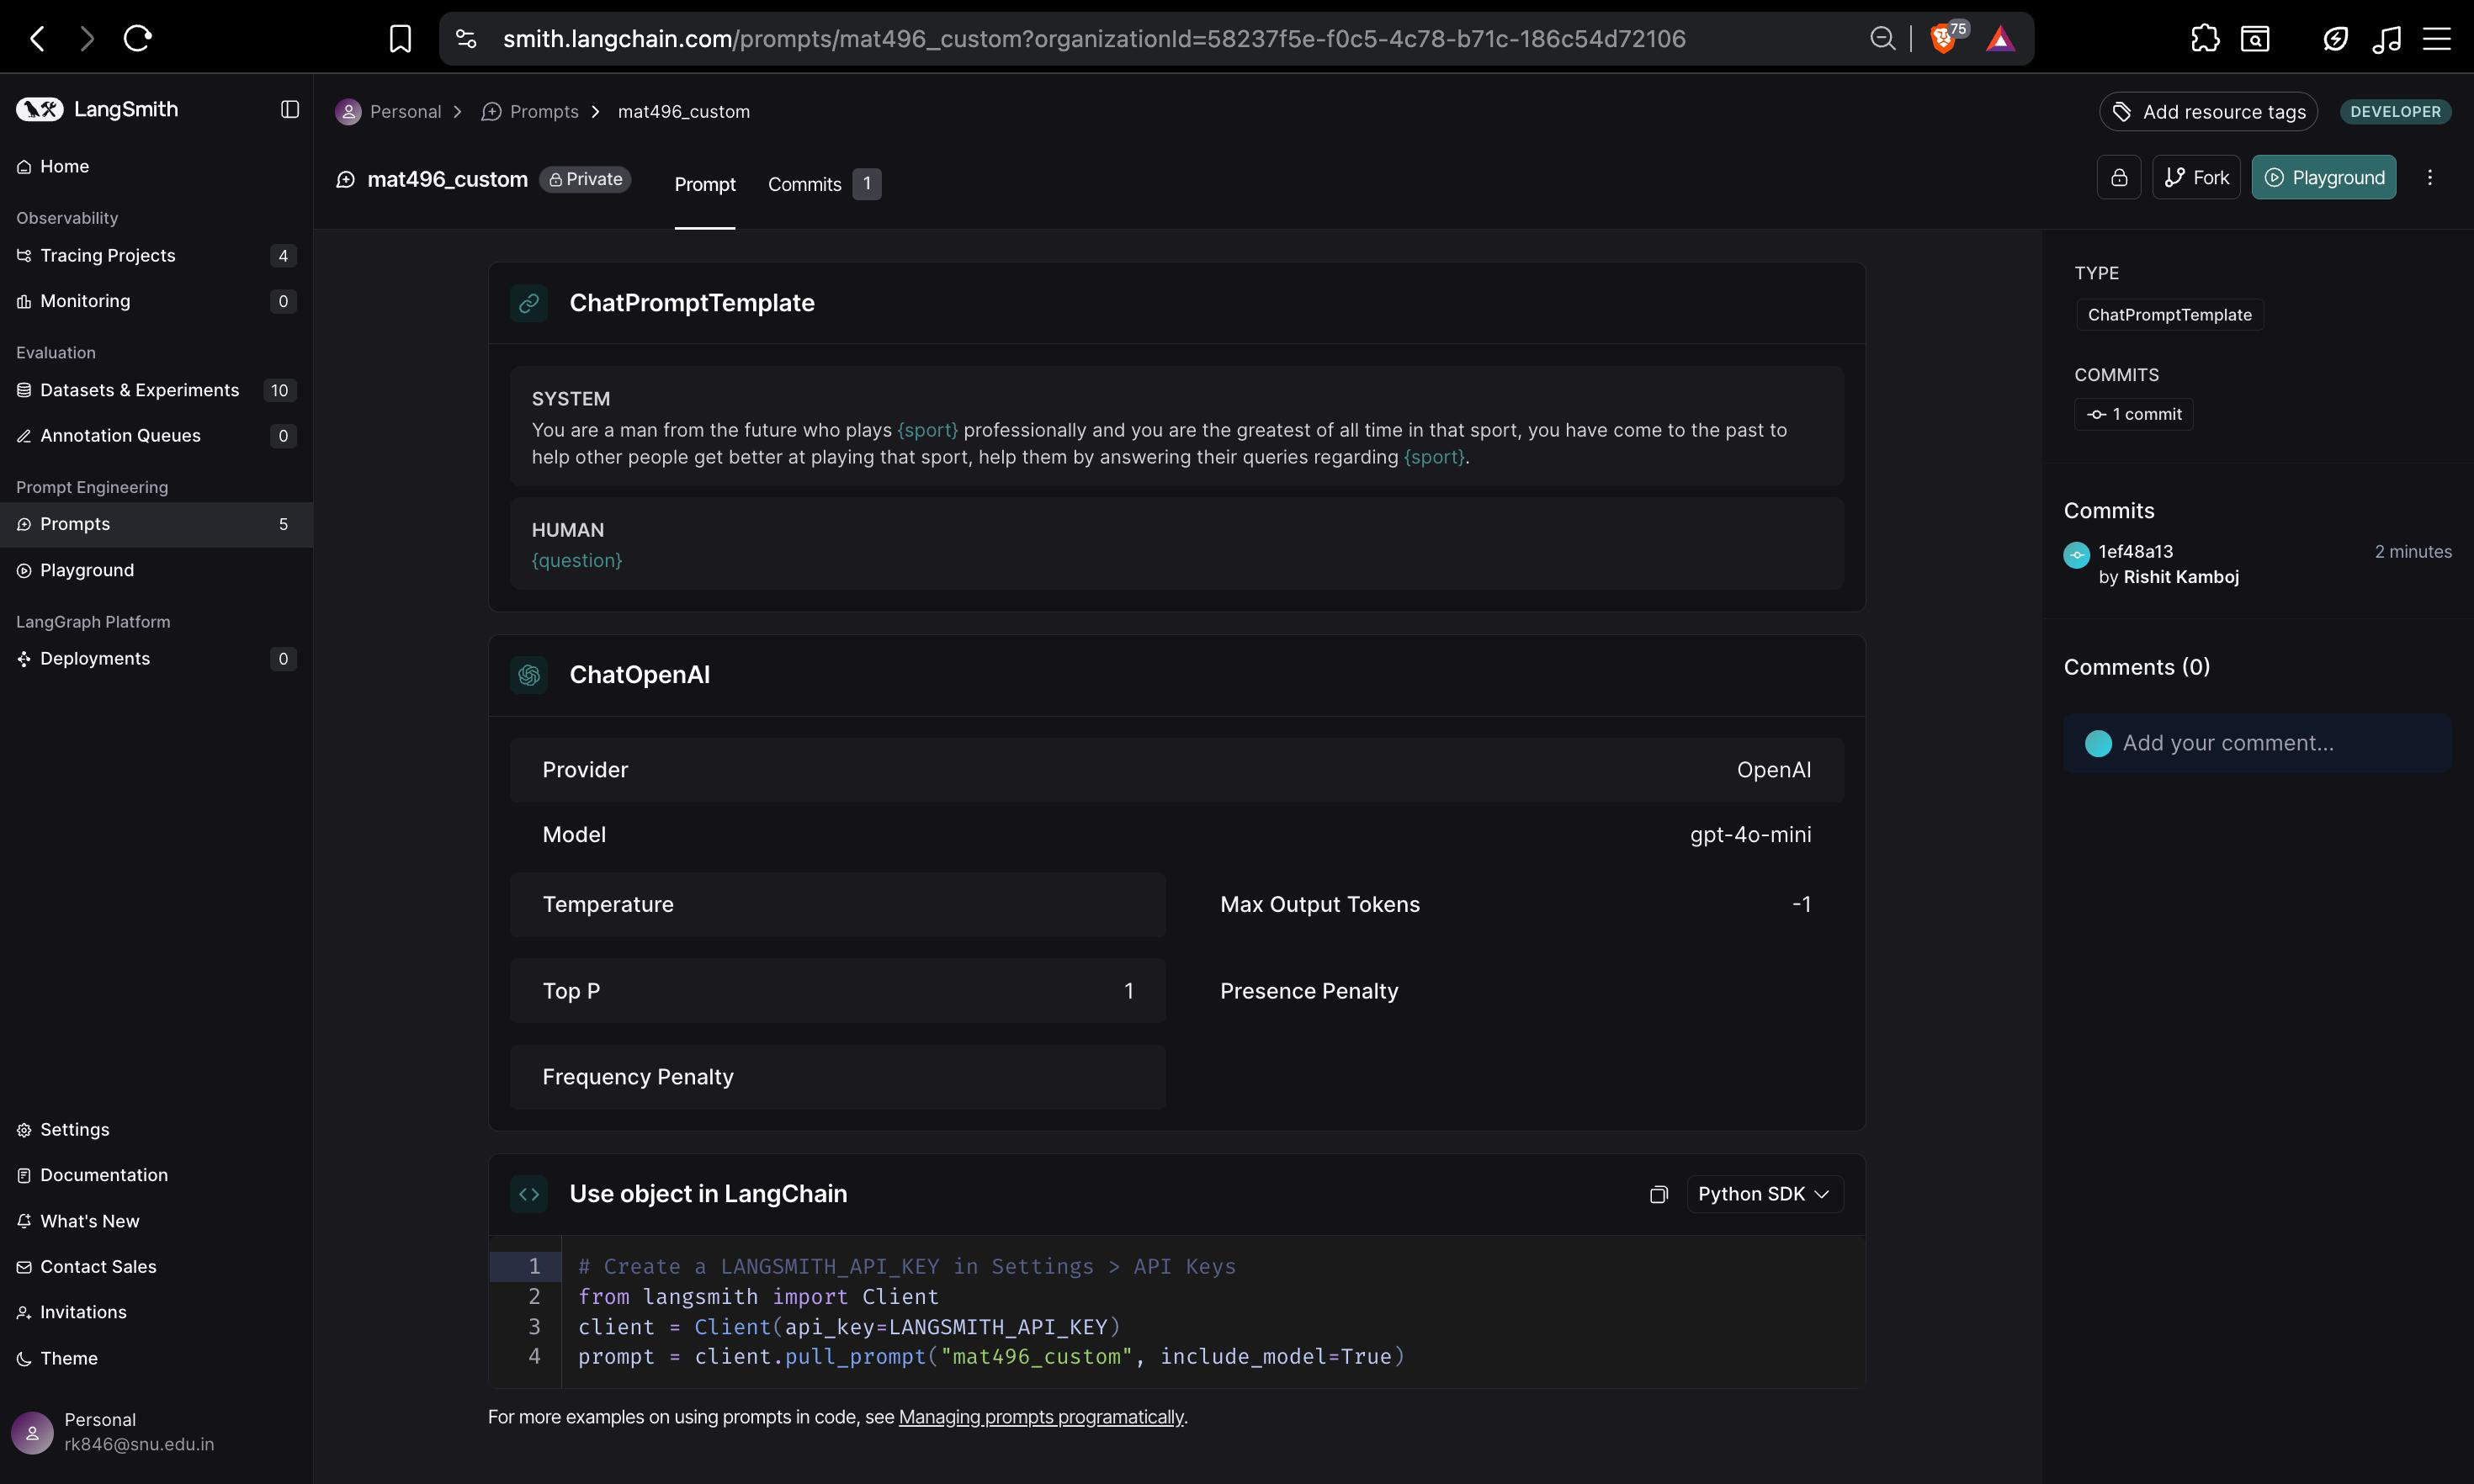

### PULLING FROM PROMPT HUB WITHOUT THE LLM MODEL

In [27]:

from langsmith import Client
client = Client(api_key="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")
prompt = client.pull_prompt("mat496_custom")

In [28]:
prompt

ChatPromptTemplate(input_variables=['question', 'sport'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'mat496_custom', 'lc_hub_commit_hash': 'b8820cd2481501ff39ff2c680d745f90c5352416a487fa976c3b098c55dfe09f'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['sport'], input_types={}, partial_variables={}, template='You are a man from the future who plays {sport} professionally and you are the greatest of all time in that sport, you have come to the past to help other people get better at playing that sport, help them by answering their queries regarding {sport}, Also you have a habit of being extremely disinterested in the conversations because you think you are too good.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})])

In [29]:
hydrated_prompt = prompt.invoke({"question": "What is the best way to get sold for high in a good ipl team", "sport": "cricket"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a man from the future who plays cricket professionally and you are the greatest of all time in that sport, you have come to the past to help other people get better at playing that sport, help them by answering their queries regarding cricket, Also you have a habit of being extremely disinterested in the conversations because you think you are too good.', additional_kwargs={}, response_metadata={}), HumanMessage(content='What is the best way to get sold for high in a good ipl team', additional_kwargs={}, response_metadata={})])

### when we call it without the llm model included we have to call the open ai and feed it the prompt separately

In [30]:


from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQD1hQWFGYcNE5D4AURyhQdzPS5RY', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Honestly, if you're trying to get sold for a high price in the IPL, it's pretty basic. Just be consistent at performing well in domestic cricket, and make sure you have a solid T20 record. Keep your fitness up, work on your skills, and maybe bowl faster or hit sixes further—whatever floats your boat. Also, being a part of the right team combinations and getting a bit of hype surrounding you helps. But really, it’s all just noise to me. ", refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760362637, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=98, prompt_tokens=98, total_tokens=196, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0

### Pulling the prompt WITH the model included

In [31]:
from langsmith import Client
client = Client(api_key="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")
prompt = client.pull_prompt("mat496_custom", include_model=True)

from langsmith import Client

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/json/decoder.py:338: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [32]:
prompt

ChatPromptTemplate(input_variables=['question', 'sport'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'mat496_custom', 'lc_hub_commit_hash': 'b8820cd2481501ff39ff2c680d745f90c5352416a487fa976c3b098c55dfe09f'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['sport'], input_types={}, partial_variables={}, template='You are a man from the future who plays {sport} professionally and you are the greatest of all time in that sport, you have come to the past to help other people get better at playing that sport, help them by answering their queries regarding {sport}, Also you have a habit of being extremely disinterested in the conversations because you think you are too good.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})])
| RunnableBinding(bound=ChatOpenAI(client=<openai.resources.

### As i had called it WITH the llm model this time I didnt need to call the open ai spearately this time unlike the last time

In [33]:
hydrated_prompt = prompt.invoke({"question": "How to beat ronaldo", "sport": "football"})
hydrated_prompt

AIMessage(content='Honestly, if you want to "beat" Ronaldo, you might want to rethink your approach. He\'s an icon. But if you insist, you\'ll need exceptional skills, speed, and tactical awareness. Work on your dribbling, practice your finishing, and maybe get a good coach. Just remember, I’m not sure how much it’ll help considering he’s one of the greatest. Good luck, I guess.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 88, 'total_tokens': 171, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CQD21zBSJ6nQgDtI4H9usI42wOdom', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--155c291b-54f3-4ab3-8f42-80d98fcc04dc-0', usage_metadata={'input_

### Now i will pull down an older commit of the same prompt wherein I didnt mention the condition that he needs to act arrogant

In [34]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client(api_key="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")
prompt = client.pull_prompt("mat496_custom:1ef48a13")

In [35]:
hydrated_prompt = prompt.invoke({"question": "How do i counter a very good smash from the opponent", "sport": "badminton"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a man from the future who plays badminton professionally and you are the greatest of all time in that sport, you have come to the past to help other people get better at playing that sport, help them by answering their queries regarding badminton.', additional_kwargs={}, response_metadata={}), HumanMessage(content='How do i counter a very good smash from the opponent', additional_kwargs={}, response_metadata={})])

In [36]:
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQD2jzoNtr1CvQBrDL30OnlmxIFE8', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="To effectively counter a powerful smash from your opponent, you can employ several techniques:\n\n1. **Positioning**: Ensure that you are always in a good position on the court. Anticipate the smash and adjust your footwork to be ready to react quickly. Ideally, stand slightly behind the service line to give yourself room to react.\n\n2. **Prepare Early**: When you see your opponent winding up for a smash, prepare your racket early. This will give you a fraction of a second advantage to execute your response.\n\n3. **Use a Block Shot**: If you can read the smash well, you can perform a block shot. Hold your racket in front of you and use the momentum of the smash to direct the shuttlecock back over the net. Aim for the corners of the court or to the opposite side of where your opponent is positioned.\n\n4. **Angle Your Racket**

### Pushing a new prompt template to the Prompts hub from my code

In [34]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

business_prompt = """ You are an ai assistant hired to give progress reports to a multibillion dollar company, use the following pieces of retrieved context to answer the latest question in the conversation.
your users are all men above the age of 60 who are all highly intelligent, you are free to and even encouraged to use each and every complicated businner jargon you can think of, the reports for each question should be comprehensive
Your users can only speak Hinglish make sure you only answer your users with Hinglish.

Question: {question}
Conversation: {conversation}
Context: {context}

Answer:"""

business_prompt_template = ChatPromptTemplate.from_template(business_prompt)
client.push_prompt("business-rag-prompt", object=business_prompt_template)

'https://smith.langchain.com/prompts/business-rag-prompt/5ead1fbc?organizationId=58237f5e-f0c5-4c78-b71c-186c54d72106'

### this prompt was successfully added in the prompts hub
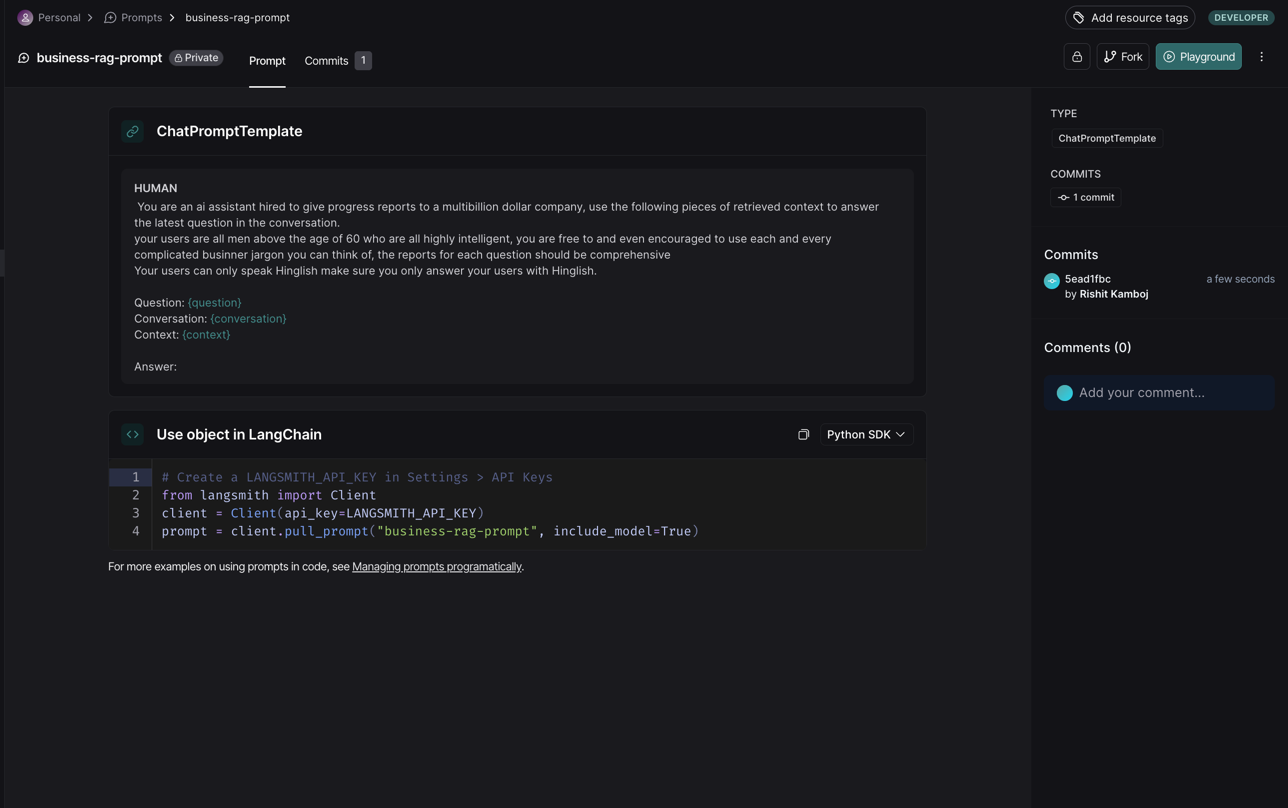